In [1]:
# imports
import numpy as np
np.random.seed(20)
from tensorflow.keras.utils import image_dataset_from_directory, set_random_seed
set_random_seed(42)
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, ReLU

In [2]:
# unzip the data
zip = zipfile.ZipFile('/content/satellite-image-classification-dataset.zip', 'r')
zip.extractall('/content')
zip.close()

In [3]:
# loading training & validation data
train_data, val_data = image_dataset_from_directory(
    directory = '/content/data',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    color_mode='rgb',
    validation_split=0.3,
    subset='both',
    batch_size=32, seed=18)

Found 5631 files belonging to 4 classes.
Using 3942 files for training.
Using 1689 files for validation.


In [4]:
# rescaling the data
def normalize(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

train_data = train_data.map(normalize)
val_data = val_data.map(normalize)

In [5]:
# defining a model architecture
model = Sequential([
    
    # convo base
    Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(256, 256, 3)),
    ReLU(),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), padding='same'),
    ReLU(),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Conv2D(filters=128, kernel_size=(3,3), padding='same'),
    ReLU(),
    MaxPooling2D(pool_size=(2,2), strides=2),
    
    # flattening 
    Flatten(),
    
    # fully connected layer
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

In [6]:
# getting a summary of the configuration
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 re_lu (ReLU)                (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 re_lu_1 (ReLU)              (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                    

In [7]:
# compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

In [8]:
# training the model
history = model.fit(train_data, validation_data=val_data, epochs=4, batch_size=32, verbose=1)

Epoch 1/4
124/124 [==============================] - 27s 85ms/step - loss: 0.4533 - accuracy: 0.7458 - val_loss: 0.3404 - val_accuracy: 0.8674
Epoch 2/4
124/124 [==============================] - 10s 76ms/step - loss: 0.2665 - accuracy: 0.8727 - val_loss: 0.2492 - val_accuracy: 0.9035
Epoch 3/4
124/124 [==============================] - 10s 79ms/step - loss: 0.2017 - accuracy: 0.9072 - val_loss: 0.2275 - val_accuracy: 0.8715
Epoch 4/4
124/124 [==============================] - 10s 80ms/step - loss: 0.1966 - accuracy: 0.9099 - val_loss: 0.1439 - val_accuracy: 0.9349


In [9]:
# model evaluation
score = model.evaluate(val_data, verbose=0)
print('Accuracy:', round((score[1] * 100), 2))

Accuracy: 93.49


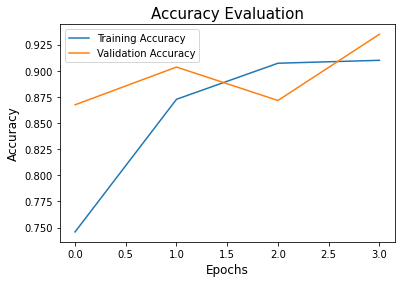

In [10]:
# accuracy evaluation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evaluation', size=15)
plt.xlabel('Epochs', size=12)
plt.ylabel('Accuracy', size=12)
plt.legend();

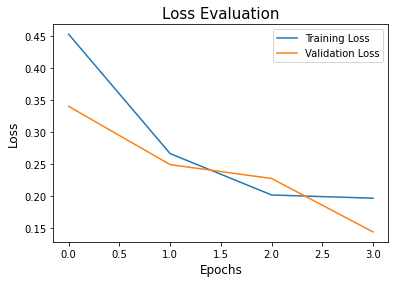

In [11]:
# loss evaluation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evaluation', size=15)
plt.xlabel('Epochs', size=12)
plt.ylabel('Loss', size=12)
plt.legend();